In [88]:
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Tuple

# Функція для генерації лінійних даних
def linear_data_tensor(
    n: int = 1000,
    a: float = 1.0,
    b: float = 0.0,
    noise: float = 0.1,
    seed: int = 42,
) -> Tuple[torch.Tensor, torch.Tensor]:
    np.random.seed(seed)
    x = np.random.uniform(0, 1, n)
    y = a * x + b + np.random.normal(0, noise, n)
    return torch.tensor(x, dtype=torch.float32).reshape(-1, 1), torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Генерація даних
x, y = linear_data_tensor(n=1000, a=2.0, b=1.0, noise=0.1, seed=42)


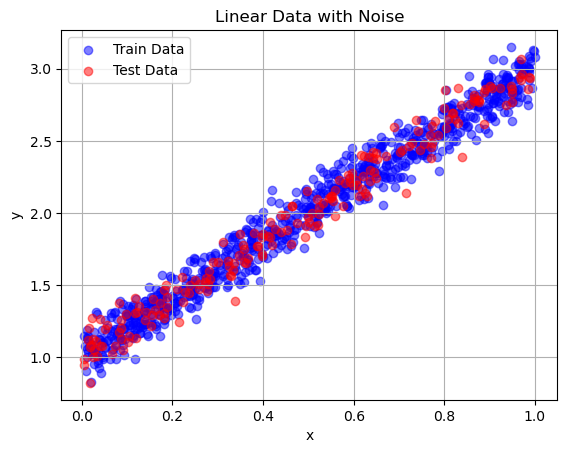

In [89]:
# Розділення на тренувальний і тестовий набори
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Візуалізація тренувальних даних
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Train Data', alpha=0.5)
plt.scatter(x_test.numpy(), y_test.numpy(), color='red', label='Test Data', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Data with Noise')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Визначаємо модель з одним перцептроном
class SimplePerceptron(nn.Module):
    def __init__(self):
        super(SimplePerceptron, self).__init__()
        self.linear = nn.Linear(1, 1)  # Одна вхідна і одна вихідна нейрони (1 шар)

    def forward(self, x):
        return self.linear(x)

# Ініціалізуємо модель, функцію втрат і оптимізатор
model = SimplePerceptron()
criterion = nn.MSELoss()  # Функція втрат — середньоквадратична помилка
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Оптимізатор — стохастичний градієнтний спуск


In [91]:
# Навчання моделі
num_epochs = 1000
for epoch in range(num_epochs):
    # Прямий прохід (обчислення передбачень)
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Очищення градієнтів
    optimizer.zero_grad()
    
    # Зворотне поширення і оптимізація
    loss.backward()
    optimizer.step()

    # Виведення втрат кожні 100 епох
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [100/1000], Loss: 0.0947
Epoch [200/1000], Loss: 0.0570
Epoch [300/1000], Loss: 0.0457
Epoch [400/1000], Loss: 0.0372
Epoch [500/1000], Loss: 0.0308
Epoch [600/1000], Loss: 0.0258
Epoch [700/1000], Loss: 0.0221
Epoch [800/1000], Loss: 0.0192
Epoch [900/1000], Loss: 0.0170
Epoch [1000/1000], Loss: 0.0154


In [92]:
# Оцінка моделі
model.eval()  # Перемикаємось у режим оцінювання
with torch.no_grad():
    predicted = model(x_test)  # Прогнозування на тестових даних
    test_loss = criterion(predicted, y_test)  # Обчислюємо втрати на тестових даних

print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0144


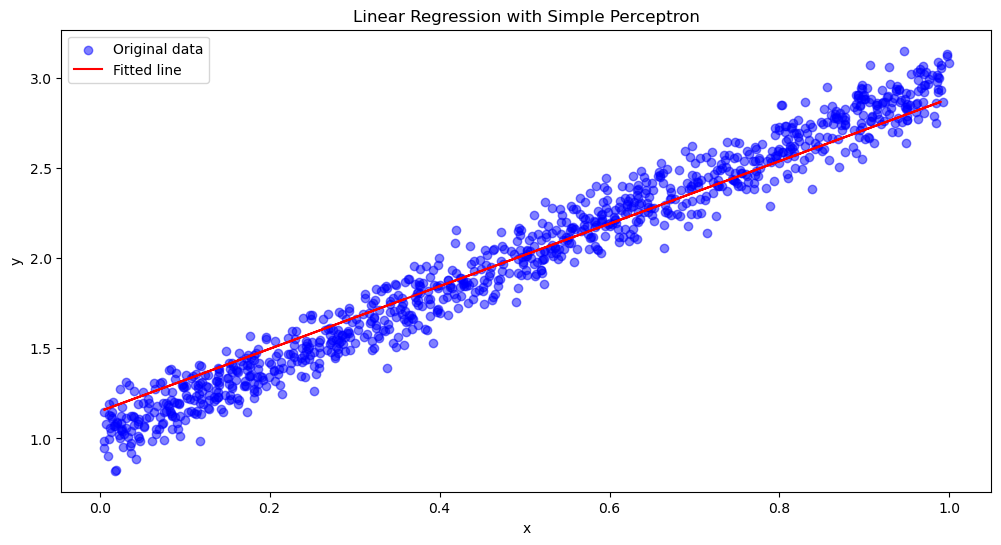

In [93]:
# Візуалізація даних
plt.figure(figsize=(12, 6))

# Оригінальні дані
plt.scatter(x.numpy(), y.numpy(), color='blue', label='Original data', alpha=0.5)

# Передбачення моделі
plt.plot(x_test.numpy(), predicted.numpy(), color='red', label='Fitted line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Simple Perceptron')
plt.legend()
plt.show()